## Deep Q-Learning Example

CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials. ref: https://gym.openai.com/envs/CartPole-v0/

References:
* https://github.com/gsurma/cartpole

In [26]:
from statistics import mean
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from collections import deque
import os
import csv
import numpy as np

%matplotlib inline  

class ScoreLogger:

    def __init__(self, env_name, scores_csv_path = None, scores_png_path = None):
        """Record learning scores and metrics including plotting functionality
        
        Args:
            env_name: Name of the environment
            scores_csv_path: Optional path to automatically save scores csv to each run
            scores_png_path: Optional path to automatically save scores png to each run
        """
        self.scores = deque(maxlen=CONSECUTIVE_RUNS_TO_SOLVE)
        self.all_scores = []
        self.env_name = env_name
        self.scores_csv_path = scores_csv_path
        self.scores_png_path = scores_png_path

        self.mean_score = 0
        
        if scores_csv_path is not None and os.path.exists(scores_csv_path):
            os.remove(scores_csv_path)
        if scores_png_path is not None and os.path.exists(scores_png_path):
            os.remove(scores_png_path)

            
    def add_score(self, score):
        self.scores.append(score)
        self.all_scores.append(score)
        self.mean_score = mean(self.scores)
        print("Scores: (min: " + str(min(self.scores)) + ", avg: " + str(self.mean_score) + ", max: " + str(max(self.scores)) + ")\n")

        if self.scores_csv_path is not None:
            self.append_csv(self.scores_csv_path, score)
        if self.scores_png_path is not None:
            ax = self.create_training_png()
            plt.savefig(output_path, bbox_inches="tight")
            plt.close()

            
    def create_training_png(self):
        return self.create_png(x_label="runs",
                           y_label="scores",
                           average_of_n_last=CONSECUTIVE_RUNS_TO_SOLVE,
                           show_goal=True,
                           show_trend=True,
                           show_legend=True)

            
    def create_png(self, x_label, y_label, average_of_n_last, show_goal, show_trend, show_legend):
        x = []
        y = []
        for i in range(0, len(self.all_scores)):
            x.append(i)
            y.append(self.all_scores[i])

        f, ax = plt.subplots()
        ax.plot(x, y, label="score per run")

        average_range = average_of_n_last if average_of_n_last is not None else len(x)
        ax.plot(x[-average_range:], [np.mean(y[-average_range:])] * len(y[-average_range:]), linestyle="--", label="last " + str(average_range) + " runs average")

        if show_goal:
            ax.plot(x, [AVERAGE_SCORE_TO_SOLVE] * len(x), linestyle=":", label=str(AVERAGE_SCORE_TO_SOLVE) + " score average goal")

        if show_trend and len(x) > 1:
            trend_x = x[1:]
            z = np.polyfit(np.array(trend_x), np.array(y[1:]), 1)
            p = np.poly1d(z)
            ax.plot(trend_x, p(trend_x), linestyle="-.",  label="trend")

        ax.set_title(self.env_name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)

        if show_legend:
            ax.legend(loc="upper left")    
            
        return ax
        
    def save_png(self, output_path, x_label, y_label, average_of_n_last, show_goal, show_trend, show_legend):
        ax = self.create_png(x_label, y_label, average_of_n_last, show_goal, show_trend, show_legend)
        plt.savefig(output_path, bbox_inches="tight")
        plt.close()
        
    def save_csv(self, path):
        scores_file = open(path, "w")
        with open(path, 'w') as f:
            for score in self.all_scores:
                f.write("%s\n" % score)

                
    def append_csv(self, path, score):
        if not os.path.exists(path):
            with open(path, "w"):
                pass
        scores_file = open(path, "a")
        with scores_file:
            writer = csv.writer(scores_file)
            writer.writerow([score])

c:\applications\miniconda3\envs\openai\lib\site-packages\ipykernel_launcher.py:3: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  This is separate from the ipykernel package so we can avoid doing imports until


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Run: 1, exploration: 0.9369146928798039, score: 33
Scores: (min: 33, avg: 33, max: 33)

Run: 2, exploration: 0.7940753492934954, score: 34
Scores: (min: 33, avg: 33.5, max: 34)

Run: 3, exploration: 0.7328768546436799, score: 17
Scores: (min: 17, avg: 28, max: 34)

Run: 4, exploration: 0.6900935609921609, score: 13
Scores: (min: 13, avg: 24.25, max: 34)

Run: 5, exploration: 0.6180388156137953, score: 23
Scores: (min: 13, avg: 24, max: 34)

Run: 6, exploration: 0.5761543988830038, score: 15
Scores: (min: 13, avg: 22.5, max: 34)

Run: 7, exploration: 0.547986285490042, score: 11
Scores: (min: 11, avg: 20.857142857142858, max: 34)

Run: 8, exploration: 0.49571413690105054, score: 21
Scores: (min: 11, avg: 20.875, max: 34)

Run: 9, exploration: 0.46211964903917074, score: 15
Scores: (min: 11, avg: 20.22222222222222, max: 34)

Run: 10, exploration: 0.4439551321314536, score: 9
Scores: (min: 9

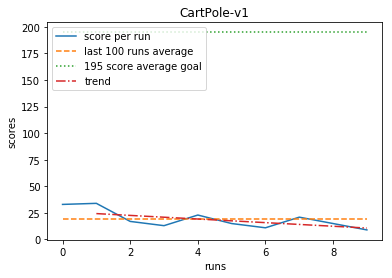

Run: 11, exploration: 0.4159480862733536, score: 14
Scores: (min: 9, avg: 18.636363636363637, max: 34)

Run: 12, exploration: 0.37627099809304654, score: 21
Scores: (min: 9, avg: 18.833333333333332, max: 34)

Run: 13, exploration: 0.3578751580867638, score: 11
Scores: (min: 9, avg: 18.23076923076923, max: 34)

Run: 14, exploration: 0.3352984938281715, score: 14
Scores: (min: 9, avg: 17.928571428571427, max: 34)

Run: 15, exploration: 0.3141460853680822, score: 14
Scores: (min: 9, avg: 17.666666666666668, max: 34)

Run: 16, exploration: 0.3017979588795719, score: 9
Scores: (min: 9, avg: 17.125, max: 34)

Run: 17, exploration: 0.2827589419554058, score: 14
Scores: (min: 9, avg: 16.941176470588236, max: 34)

Run: 18, exploration: 0.26759021970270175, score: 12
Scores: (min: 9, avg: 16.666666666666668, max: 34)

Run: 19, exploration: 0.2532352299289372, score: 12
Scores: (min: 9, avg: 16.42105263157895, max: 34)

Run: 20, exploration: 0.2178795886667409, score: 31
Scores: (min: 9, avg: 17.

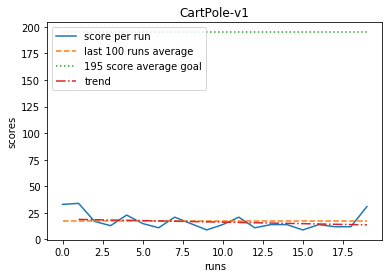

Run: 21, exploration: 0.2041345879004775, score: 14
Scores: (min: 9, avg: 17, max: 34)

Run: 22, exploration: 0.19513012515638165, score: 10
Scores: (min: 9, avg: 16.681818181818183, max: 34)

Run: 23, exploration: 0.1865228530605915, score: 10
Scores: (min: 9, avg: 16.391304347826086, max: 34)

Run: 24, exploration: 0.17829525136613786, score: 10
Scores: (min: 9, avg: 16.125, max: 34)

Run: 25, exploration: 0.17214774642209296, score: 8
Scores: (min: 8, avg: 15.8, max: 34)

Run: 26, exploration: 0.16538114245489302, score: 9
Scores: (min: 8, avg: 15.538461538461538, max: 34)

Run: 27, exploration: 0.1572956799768517, score: 11
Scores: (min: 8, avg: 15.37037037037037, max: 34)

Run: 28, exploration: 0.14885748713096328, score: 12
Scores: (min: 8, avg: 15.25, max: 34)

Run: 29, exploration: 0.14016760486247823, score: 13
Scores: (min: 8, avg: 15.172413793103448, max: 34)

Run: 30, exploration: 0.1313250884614265, score: 14
Scores: (min: 8, avg: 15.133333333333333, max: 34)



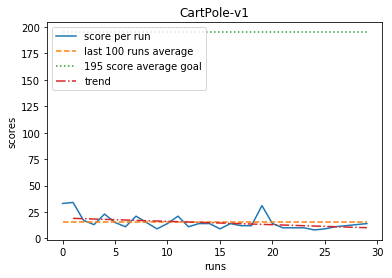

Run: 31, exploration: 0.1261630989318213, score: 9
Scores: (min: 8, avg: 14.935483870967742, max: 34)

Run: 32, exploration: 0.12181307688414106, score: 8
Scores: (min: 8, avg: 14.71875, max: 34)

Run: 33, exploration: 0.11643985070121858, score: 10
Scores: (min: 8, avg: 14.575757575757576, max: 34)

Run: 34, exploration: 0.11019338598389174, score: 12
Scores: (min: 8, avg: 14.5, max: 34)

Run: 35, exploration: 0.10586201936274783, score: 9
Scores: (min: 8, avg: 14.342857142857143, max: 34)

Run: 36, exploration: 0.10068643904747315, score: 11
Scores: (min: 8, avg: 14.25, max: 34)

Run: 37, exploration: 0.09624511776741324, score: 10
Scores: (min: 8, avg: 14.135135135135135, max: 34)

Run: 38, exploration: 0.09199970504166631, score: 10
Scores: (min: 8, avg: 14.026315789473685, max: 34)

Run: 39, exploration: 0.08838347664452084, score: 9
Scores: (min: 8, avg: 13.897435897435898, max: 34)

Run: 40, exploration: 0.08448484422350626, score: 10
Scores: (min: 8, avg: 13.8, max: 34)



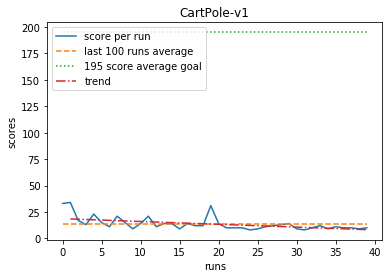

Run: 41, exploration: 0.08035439121179945, score: 11
Scores: (min: 8, avg: 13.731707317073171, max: 34)

Run: 42, exploration: 0.07342180695061275, score: 19
Scores: (min: 8, avg: 13.857142857142858, max: 34)

Run: 43, exploration: 0.0677632708131484, score: 17
Scores: (min: 8, avg: 13.930232558139535, max: 34)

Run: 44, exploration: 0.06348840406243188, score: 14
Scores: (min: 8, avg: 13.931818181818182, max: 34)

Run: 45, exploration: 0.058889873488111255, score: 16
Scores: (min: 8, avg: 13.977777777777778, max: 34)

Run: 46, exploration: 0.0543512971290831, score: 17
Scores: (min: 8, avg: 14.043478260869565, max: 34)

Run: 47, exploration: 0.04794981455780219, score: 26
Scores: (min: 8, avg: 14.297872340425531, max: 34)

Run: 48, exploration: 0.04063952250178857, score: 34
Scores: (min: 8, avg: 14.708333333333334, max: 34)

Run: 49, exploration: 0.034443736736092176, score: 34
Scores: (min: 8, avg: 15.10204081632653, max: 34)

Run: 50, exploration: 0.02128756625768776, score: 97
Sco

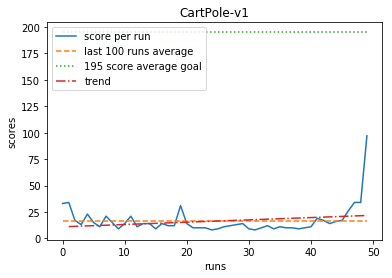

Run: 51, exploration: 0.018874695352408037, score: 25
Scores: (min: 8, avg: 16.901960784313726, max: 97)

Run: 52, exploration: 0.014398800381387675, score: 55
Scores: (min: 8, avg: 17.634615384615383, max: 97)

Run: 53, exploration: 0.012766746905164949, score: 25
Scores: (min: 8, avg: 17.77358490566038, max: 97)

Run: 54, exploration: 0.01137656378004644, score: 24
Scores: (min: 8, avg: 17.88888888888889, max: 97)

Run: 55, exploration: 0.01, score: 37
Scores: (min: 8, avg: 18.236363636363638, max: 97)

Run: 56, exploration: 0.01, score: 44
Scores: (min: 8, avg: 18.696428571428573, max: 97)

Run: 57, exploration: 0.01, score: 32
Scores: (min: 8, avg: 18.92982456140351, max: 97)

Run: 58, exploration: 0.01, score: 29
Scores: (min: 8, avg: 19.103448275862068, max: 97)

Run: 59, exploration: 0.01, score: 11
Scores: (min: 8, avg: 18.966101694915253, max: 97)

Run: 60, exploration: 0.01, score: 27
Scores: (min: 8, avg: 19.1, max: 97)



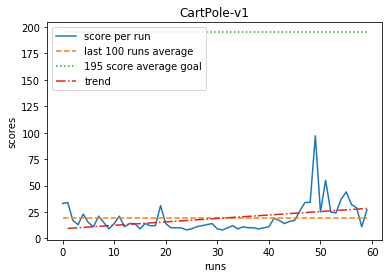

Run: 61, exploration: 0.01, score: 36
Scores: (min: 8, avg: 19.37704918032787, max: 97)

Run: 62, exploration: 0.01, score: 27
Scores: (min: 8, avg: 19.5, max: 97)

Run: 63, exploration: 0.01, score: 28
Scores: (min: 8, avg: 19.634920634920636, max: 97)

Run: 64, exploration: 0.01, score: 12
Scores: (min: 8, avg: 19.515625, max: 97)

Run: 65, exploration: 0.01, score: 38
Scores: (min: 8, avg: 19.8, max: 97)

Run: 66, exploration: 0.01, score: 26
Scores: (min: 8, avg: 19.893939393939394, max: 97)

Run: 67, exploration: 0.01, score: 40
Scores: (min: 8, avg: 20.19402985074627, max: 97)

Run: 68, exploration: 0.01, score: 19
Scores: (min: 8, avg: 20.176470588235293, max: 97)

Run: 69, exploration: 0.01, score: 13
Scores: (min: 8, avg: 20.07246376811594, max: 97)

Run: 70, exploration: 0.01, score: 19
Scores: (min: 8, avg: 20.057142857142857, max: 97)



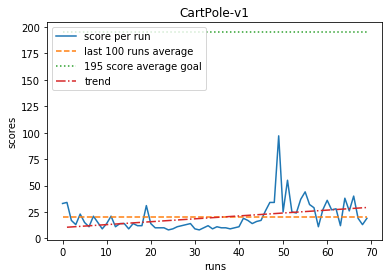

Run: 71, exploration: 0.01, score: 18
Scores: (min: 8, avg: 20.028169014084508, max: 97)

Run: 72, exploration: 0.01, score: 31
Scores: (min: 8, avg: 20.180555555555557, max: 97)

Run: 73, exploration: 0.01, score: 41
Scores: (min: 8, avg: 20.465753424657535, max: 97)

Run: 74, exploration: 0.01, score: 66
Scores: (min: 8, avg: 21.08108108108108, max: 97)

Run: 75, exploration: 0.01, score: 39
Scores: (min: 8, avg: 21.32, max: 97)

Run: 76, exploration: 0.01, score: 11
Scores: (min: 8, avg: 21.18421052631579, max: 97)

Run: 77, exploration: 0.01, score: 25
Scores: (min: 8, avg: 21.233766233766232, max: 97)

Run: 78, exploration: 0.01, score: 33
Scores: (min: 8, avg: 21.384615384615383, max: 97)

Run: 79, exploration: 0.01, score: 36
Scores: (min: 8, avg: 21.569620253164558, max: 97)

Run: 80, exploration: 0.01, score: 28
Scores: (min: 8, avg: 21.65, max: 97)



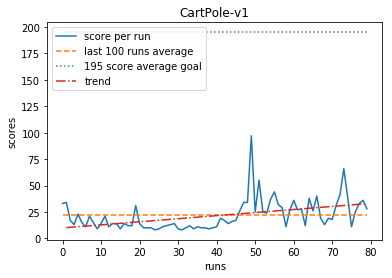

Run: 81, exploration: 0.01, score: 30
Scores: (min: 8, avg: 21.753086419753085, max: 97)

Run: 82, exploration: 0.01, score: 30
Scores: (min: 8, avg: 21.853658536585368, max: 97)

Run: 83, exploration: 0.01, score: 8
Scores: (min: 8, avg: 21.686746987951807, max: 97)

Run: 84, exploration: 0.01, score: 41
Scores: (min: 8, avg: 21.916666666666668, max: 97)

Run: 85, exploration: 0.01, score: 33
Scores: (min: 8, avg: 22.04705882352941, max: 97)

Run: 86, exploration: 0.01, score: 33
Scores: (min: 8, avg: 22.174418604651162, max: 97)

Run: 87, exploration: 0.01, score: 34
Scores: (min: 8, avg: 22.310344827586206, max: 97)

Run: 88, exploration: 0.01, score: 15
Scores: (min: 8, avg: 22.227272727272727, max: 97)

Run: 89, exploration: 0.01, score: 39
Scores: (min: 8, avg: 22.415730337078653, max: 97)

Run: 90, exploration: 0.01, score: 47
Scores: (min: 8, avg: 22.68888888888889, max: 97)



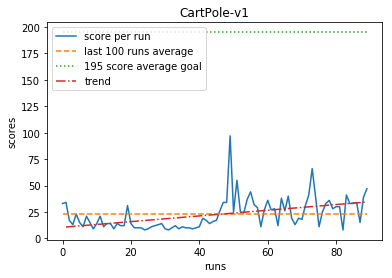

Run: 91, exploration: 0.01, score: 30
Scores: (min: 8, avg: 22.76923076923077, max: 97)

Run: 92, exploration: 0.01, score: 60
Scores: (min: 8, avg: 23.17391304347826, max: 97)

Run: 93, exploration: 0.01, score: 77
Scores: (min: 8, avg: 23.752688172043012, max: 97)

Run: 94, exploration: 0.01, score: 113
Scores: (min: 8, avg: 24.70212765957447, max: 113)

Run: 95, exploration: 0.01, score: 54
Scores: (min: 8, avg: 25.010526315789473, max: 113)

Run: 96, exploration: 0.01, score: 71
Scores: (min: 8, avg: 25.489583333333332, max: 113)

Run: 97, exploration: 0.01, score: 35
Scores: (min: 8, avg: 25.587628865979383, max: 113)

Run: 98, exploration: 0.01, score: 48
Scores: (min: 8, avg: 25.816326530612244, max: 113)

Run: 99, exploration: 0.01, score: 78
Scores: (min: 8, avg: 26.343434343434343, max: 113)

Run: 100, exploration: 0.01, score: 65
Scores: (min: 8, avg: 26.73, max: 113)



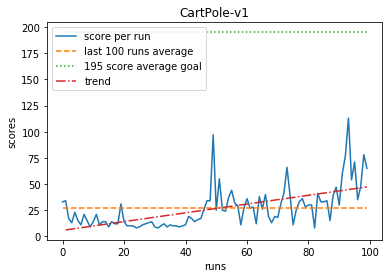

Run: 101, exploration: 0.01, score: 177
Scores: (min: 8, avg: 28.17, max: 177)

Run: 102, exploration: 0.01, score: 110
Scores: (min: 8, avg: 28.93, max: 177)

Run: 103, exploration: 0.01, score: 107
Scores: (min: 8, avg: 29.83, max: 177)

Run: 104, exploration: 0.01, score: 64
Scores: (min: 8, avg: 30.34, max: 177)

Run: 105, exploration: 0.01, score: 78
Scores: (min: 8, avg: 30.89, max: 177)

Run: 106, exploration: 0.01, score: 88
Scores: (min: 8, avg: 31.62, max: 177)

Run: 107, exploration: 0.01, score: 153
Scores: (min: 8, avg: 33.04, max: 177)

Run: 108, exploration: 0.01, score: 131
Scores: (min: 8, avg: 34.14, max: 177)

Run: 109, exploration: 0.01, score: 63
Scores: (min: 8, avg: 34.62, max: 177)

Run: 110, exploration: 0.01, score: 17
Scores: (min: 8, avg: 34.7, max: 177)



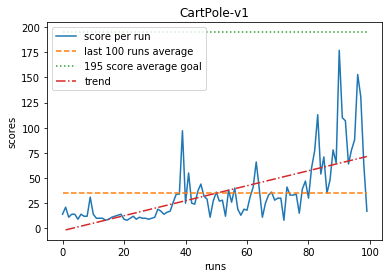

Run: 111, exploration: 0.01, score: 123
Scores: (min: 8, avg: 35.79, max: 177)

Run: 112, exploration: 0.01, score: 272
Scores: (min: 8, avg: 38.3, max: 272)

Run: 113, exploration: 0.01, score: 140
Scores: (min: 8, avg: 39.59, max: 272)

Run: 114, exploration: 0.01, score: 172
Scores: (min: 8, avg: 41.17, max: 272)

Run: 115, exploration: 0.01, score: 200
Scores: (min: 8, avg: 43.03, max: 272)

Run: 116, exploration: 0.01, score: 171
Scores: (min: 8, avg: 44.65, max: 272)

Run: 117, exploration: 0.01, score: 136
Scores: (min: 8, avg: 45.87, max: 272)

Run: 118, exploration: 0.01, score: 194
Scores: (min: 8, avg: 47.69, max: 272)

Run: 119, exploration: 0.01, score: 170
Scores: (min: 8, avg: 49.27, max: 272)

Run: 120, exploration: 0.01, score: 241
Scores: (min: 8, avg: 51.37, max: 272)



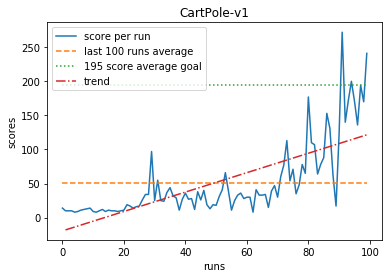

Run: 121, exploration: 0.01, score: 176
Scores: (min: 8, avg: 52.99, max: 272)

Run: 122, exploration: 0.01, score: 179
Scores: (min: 8, avg: 54.68, max: 272)

Run: 123, exploration: 0.01, score: 179
Scores: (min: 8, avg: 56.37, max: 272)

Run: 124, exploration: 0.01, score: 143
Scores: (min: 8, avg: 57.7, max: 272)

Run: 125, exploration: 0.01, score: 158
Scores: (min: 8, avg: 59.2, max: 272)

Run: 126, exploration: 0.01, score: 155
Scores: (min: 8, avg: 60.66, max: 272)

Run: 127, exploration: 0.01, score: 174
Scores: (min: 8, avg: 62.29, max: 272)

Run: 128, exploration: 0.01, score: 155
Scores: (min: 8, avg: 63.72, max: 272)

Run: 129, exploration: 0.01, score: 152
Scores: (min: 8, avg: 65.11, max: 272)

Run: 130, exploration: 0.01, score: 176
Scores: (min: 8, avg: 66.73, max: 272)



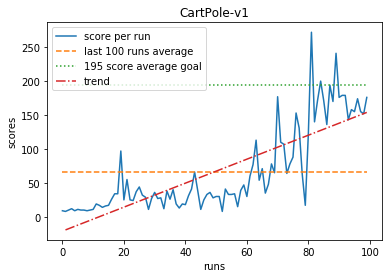

Run: 131, exploration: 0.01, score: 167
Scores: (min: 8, avg: 68.31, max: 272)

Run: 132, exploration: 0.01, score: 170
Scores: (min: 8, avg: 69.93, max: 272)

Run: 133, exploration: 0.01, score: 187
Scores: (min: 8, avg: 71.7, max: 272)

Run: 134, exploration: 0.01, score: 171
Scores: (min: 8, avg: 73.29, max: 272)

Run: 135, exploration: 0.01, score: 184
Scores: (min: 8, avg: 75.04, max: 272)

Run: 136, exploration: 0.01, score: 222
Scores: (min: 8, avg: 77.15, max: 272)

Run: 137, exploration: 0.01, score: 207
Scores: (min: 8, avg: 79.12, max: 272)

Run: 138, exploration: 0.01, score: 205
Scores: (min: 8, avg: 81.07, max: 272)

Run: 139, exploration: 0.01, score: 209
Scores: (min: 8, avg: 83.07, max: 272)

Run: 140, exploration: 0.01, score: 158
Scores: (min: 8, avg: 84.55, max: 272)



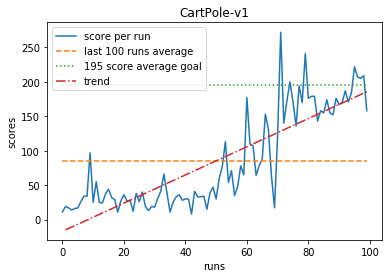

Run: 141, exploration: 0.01, score: 188
Scores: (min: 8, avg: 86.32, max: 272)

Run: 142, exploration: 0.01, score: 196
Scores: (min: 8, avg: 88.09, max: 272)

Run: 143, exploration: 0.01, score: 168
Scores: (min: 8, avg: 89.6, max: 272)

Run: 144, exploration: 0.01, score: 215
Scores: (min: 8, avg: 91.61, max: 272)

Run: 145, exploration: 0.01, score: 279
Scores: (min: 8, avg: 94.24, max: 279)

Run: 146, exploration: 0.01, score: 304
Scores: (min: 8, avg: 97.11, max: 304)

Run: 147, exploration: 0.01, score: 154
Scores: (min: 8, avg: 98.39, max: 304)

Run: 148, exploration: 0.01, score: 181
Scores: (min: 8, avg: 99.86, max: 304)

Run: 149, exploration: 0.01, score: 153
Scores: (min: 8, avg: 101.05, max: 304)

Run: 150, exploration: 0.01, score: 195
Scores: (min: 8, avg: 102.03, max: 304)



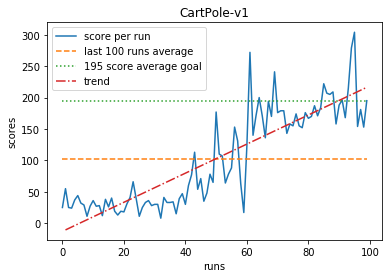

Run: 151, exploration: 0.01, score: 212
Scores: (min: 8, avg: 103.9, max: 304)

Run: 152, exploration: 0.01, score: 200
Scores: (min: 8, avg: 105.35, max: 304)

Run: 153, exploration: 0.01, score: 249
Scores: (min: 8, avg: 107.59, max: 304)

Run: 154, exploration: 0.01, score: 244
Scores: (min: 8, avg: 109.79, max: 304)

Run: 155, exploration: 0.01, score: 181
Scores: (min: 8, avg: 111.23, max: 304)

Run: 156, exploration: 0.01, score: 253
Scores: (min: 8, avg: 113.32, max: 304)

Run: 157, exploration: 0.01, score: 247
Scores: (min: 8, avg: 115.47, max: 304)

Run: 158, exploration: 0.01, score: 270
Scores: (min: 8, avg: 117.88, max: 304)

Run: 159, exploration: 0.01, score: 266
Scores: (min: 8, avg: 120.43, max: 304)

Run: 160, exploration: 0.01, score: 197
Scores: (min: 8, avg: 122.13, max: 304)



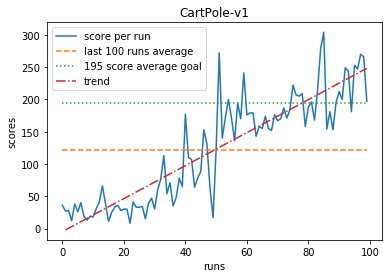

Run: 161, exploration: 0.01, score: 227
Scores: (min: 8, avg: 124.04, max: 304)

Run: 162, exploration: 0.01, score: 256
Scores: (min: 8, avg: 126.33, max: 304)

Run: 163, exploration: 0.01, score: 238
Scores: (min: 8, avg: 128.43, max: 304)

Run: 164, exploration: 0.01, score: 295
Scores: (min: 8, avg: 131.26, max: 304)

Run: 165, exploration: 0.01, score: 388
Scores: (min: 8, avg: 134.76, max: 388)

Run: 166, exploration: 0.01, score: 235
Scores: (min: 8, avg: 136.85, max: 388)

Run: 167, exploration: 0.01, score: 305
Scores: (min: 8, avg: 139.5, max: 388)

Run: 168, exploration: 0.01, score: 246
Scores: (min: 8, avg: 141.77, max: 388)

Run: 169, exploration: 0.01, score: 192
Scores: (min: 8, avg: 143.56, max: 388)

Run: 170, exploration: 0.01, score: 238
Scores: (min: 8, avg: 145.75, max: 388)



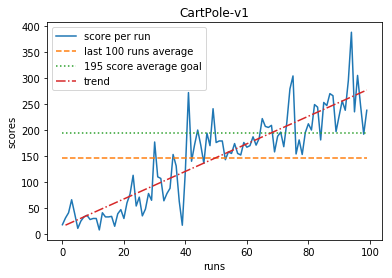

Run: 171, exploration: 0.01, score: 282
Scores: (min: 8, avg: 148.39, max: 388)

Run: 172, exploration: 0.01, score: 244
Scores: (min: 8, avg: 150.52, max: 388)

Run: 173, exploration: 0.01, score: 229
Scores: (min: 8, avg: 152.4, max: 388)

Run: 174, exploration: 0.01, score: 232
Scores: (min: 8, avg: 154.06, max: 388)

Run: 175, exploration: 0.01, score: 230
Scores: (min: 8, avg: 155.97, max: 388)

Run: 176, exploration: 0.01, score: 202
Scores: (min: 8, avg: 157.88, max: 388)

Run: 177, exploration: 0.01, score: 208
Scores: (min: 8, avg: 159.71, max: 388)

Run: 178, exploration: 0.01, score: 217
Scores: (min: 8, avg: 161.55, max: 388)

Run: 179, exploration: 0.01, score: 189
Scores: (min: 8, avg: 163.08, max: 388)

Run: 180, exploration: 0.01, score: 195
Scores: (min: 8, avg: 164.75, max: 388)



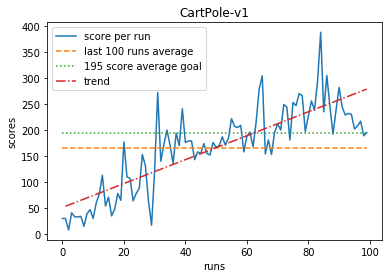

Run: 181, exploration: 0.01, score: 183
Scores: (min: 8, avg: 166.28, max: 388)

Run: 182, exploration: 0.01, score: 201
Scores: (min: 8, avg: 167.99, max: 388)

Run: 183, exploration: 0.01, score: 285
Scores: (min: 15, avg: 170.76, max: 388)

Run: 184, exploration: 0.01, score: 193
Scores: (min: 15, avg: 172.28, max: 388)

Run: 185, exploration: 0.01, score: 238
Scores: (min: 15, avg: 174.33, max: 388)

Run: 186, exploration: 0.01, score: 199
Scores: (min: 15, avg: 175.99, max: 388)

Run: 187, exploration: 0.01, score: 175
Scores: (min: 15, avg: 177.4, max: 388)

Run: 188, exploration: 0.01, score: 332
Scores: (min: 17, avg: 180.57, max: 388)

Run: 189, exploration: 0.01, score: 500
Scores: (min: 17, avg: 185.18, max: 500)

Run: 190, exploration: 0.01, score: 500
Scores: (min: 17, avg: 189.71, max: 500)



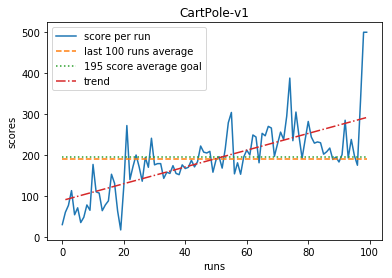

Run: 191, exploration: 0.01, score: 166
Scores: (min: 17, avg: 191.07, max: 500)

Run: 192, exploration: 0.01, score: 146
Scores: (min: 17, avg: 191.93, max: 500)

Run: 193, exploration: 0.01, score: 169
Scores: (min: 17, avg: 192.85, max: 500)

Run: 194, exploration: 0.01, score: 179
Scores: (min: 17, avg: 193.51, max: 500)

Run: 195, exploration: 0.01, score: 193
Scores: (min: 17, avg: 194.9, max: 500)

Run: 196, exploration: 0.01, score: 286
Scores: (min: 17, avg: 197.05, max: 500)

Solved in 96 runs, 196 total runs.


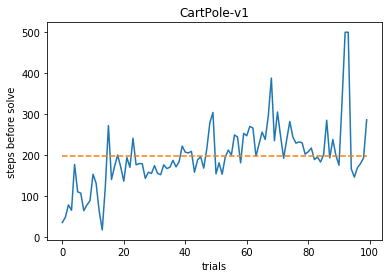

In [28]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

ENV_NAME = "CartPole-v1"

GAMMA = 0.95
LEARNING_RATE = 0.001

MEMORY_SIZE = 1000000
BATCH_SIZE = 20

EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.01
EXPLORATION_DECAY = 0.995


SCORES_CSV_PATH = "./DQN-scores.csv"
SCORES_PNG_PATH = "./DQN-scores.png"
SOLVED_CSV_PATH = "./DQN-solved.csv"
SOLVED_PNG_PATH = "./DQN-solved.png"
AVERAGE_SCORE_TO_SOLVE = 195
CONSECUTIVE_RUNS_TO_SOLVE = 100

class DQNSolver:

    def __init__(self, observation_space, action_space):
        self.exploration_rate = EXPLORATION_MAX

        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)

        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def experience_replay(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0]))
            q_values = self.model.predict(state)
            q_values[0][action] = q_update
            self.model.fit(state, q_values, verbose=0)
        self.exploration_rate *= EXPLORATION_DECAY
        self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)


env = gym.make(ENV_NAME)
score_logger = ScoreLogger(ENV_NAME)
observation_space = env.observation_space.shape[0]
action_space = env.action_space.n
dqn_solver = DQNSolver(observation_space, action_space)
run = 0
while True:
    run += 1
    state = env.reset()
    state = np.reshape(state, [1, observation_space])
    step = 0
    while True:
        step += 1
        #env.render()
        action = dqn_solver.act(state)
        state_next, reward, terminal, info = env.step(action)
        reward = reward if not terminal else -reward
        state_next = np.reshape(state_next, [1, observation_space])
        dqn_solver.remember(state, action, reward, state_next, terminal)
        state = state_next
        if terminal:
            print("Run: " + str(run) + ", exploration: " + str(dqn_solver.exploration_rate) + ", score: " + str(step))
            score_logger.add_score(step)
            if run % 10 == 0:
                ax = score_logger.create_training_png()
                plt.show()
            break
        dqn_solver.experience_replay()
        
    if score_logger.mean_score >= AVERAGE_SCORE_TO_SOLVE and len(score_logger.scores) >= CONSECUTIVE_RUNS_TO_SOLVE:
        # score_logger scores is limited to CONSECUTIVE_RUNS_TO_SOLVE so run could be bigger
        solve_score = run - CONSECUTIVE_RUNS_TO_SOLVE 
        print( "Solved in " + str(solve_score) + " runs, " + str(run) + " total runs.")
        #score_logger.save_csv(SOLVED_CSV_PATH, solve_score)
        #score_logger._save_png(output_path=SOLVED_PNG_PATH,
        #               x_label="trials",
        #               y_label="steps before solve",
        #               average_of_n_last=None,
        #               show_goal=False,
        #               show_trend=False,
        #               show_legend=False)
        ax = score_logger.create_png(x_label="trials",
                       y_label="steps before solve",
                       average_of_n_last=None,
                       show_goal=False,
                       show_trend=False,
                       show_legend=False)
        plt.show()
        break       